Accuracy: 79.30%


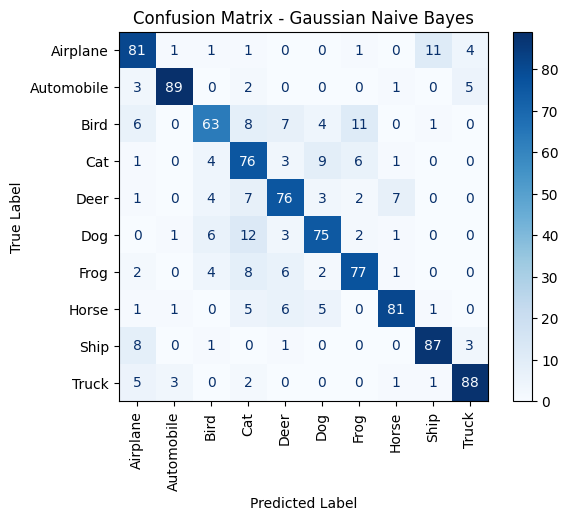

Metric     | Value     
-------------------------
Accuracy   | 0.7930
Precision  | 0.7975
Recall     | 0.7930
F1-Score   | 0.7937


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the previously saved feature vectors and labels
train_features = np.load('train_features_pca.npy')
test_features = np.load('test_features_pca.npy')
train_labels = np.load('train_labels.npy')
test_labels = np.load('test_labels.npy')

# Gaussian Naive Bayes Classifier
class GaussianNaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.class_means = None
        self.class_vars = None

    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        n_classes = len(self.classes)
        n_features = X_train.shape[1]
        
        self.class_probs = np.zeros(n_classes)
        self.class_means = np.zeros((n_classes, n_features))
        self.class_vars = np.zeros((n_classes, n_features))
        
        for c in self.classes:
            X_c = X_train[y_train == c]
            self.class_probs[c] = len(X_c) / float(len(X_train))
            self.class_means[c] = np.mean(X_c, axis=0)
            self.class_vars[c] = np.var(X_c, axis=0)

    def predict(self, X):
        posteriors = []
        
        for c in self.classes:
            prior = np.log(self.class_probs[c])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.class_vars[c])) - \
                         0.5 * np.sum(((X - self.class_means[c])**2) / self.class_vars[c])
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors)]

    def predict_batch(self, X):
        return np.array([self.predict(x) for x in X])

# Initialize and fit the model
gnb = GaussianNaiveBayes()
gnb.fit(train_features, train_labels)

# Make predictions on the test data
predictions = gnb.predict_batch(test_features)



# 1. Confusion Matrix Visualization
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer","Dog", "Frog", "Horse", "Ship", "Truck"]
cm = confusion_matrix(test_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')  # Rotate x-axis labels if they overlap
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Metrics Table
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    true_positives = np.diag(cm)
    false_positives = np.sum(cm, axis=0) - true_positives
    false_negatives = np.sum(cm, axis=1) - true_positives
    true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(true_positives) / np.sum(cm)
    
    return accuracy, precision, recall, f1_score

# Calculate metrics
accuracy, precision, recall, f1_score = calculate_metrics(test_labels, predictions)

# Print metrics in a table format
print(f"{'Metric':<10} | {'Value':<10}")
print("-" * 25)
print(f"Accuracy   | {accuracy:.4f}")
print(f"Precision  | {np.mean(precision):.4f}")
print(f"Recall     | {np.mean(recall):.4f}")
print(f"F1-Score   | {np.mean(f1_score):.4f}")
